In [18]:
# Import the necessary libraries
from pandas_profiling import ProfileReport
from tqdm import tqdm
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_auc_score, plot_roc_curve, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.feature_selection import RFE
from sklearn import preprocessing
import seaborn as sns
sns.set()
np.random.seed(1001)

# Read the Data Set
data = pd.read_csv('online_shoppers_purchase_intention.csv', sep=',', encoding='latin-1')

In [19]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [3]:
# The above table says that some of the "Categorical" features are wrongly defined as "Numeric"
# The data types of those features are changed to "Categorical"
data["OperatingSystems"] = data["OperatingSystems"].astype('category')
data["Browser"] = data["Browser"].astype('category')
data["Region"] = data["Region"].astype('category')
data["TrafficType"] = data["TrafficType"].astype('category')
data["VisitorType"] = data["VisitorType"].astype('category')

# Change the "True" and "False" values in the feature columns "Revenue" and "Weekend" to "1" and "0"
data['Revenue'] = data['Revenue'].replace({True: 1, False: 0})
data['Weekend'] = data['Weekend'].replace({True: 1, False: 0})

In [4]:
#     Let's have a look at the data and check for:
  
# 1)  Check if there is any missing value
# 2)  Check whether there is any multicolinearity

ProfileReport(data)

In [5]:
# The data profile report above suggests that the features "ExitRates" and "BounceRates" are highly correlated.
# So, the feature "ExitRates" is deleted.
data = data.drop('ExitRates', axis = 1)

# Drop the duplicate rows
data = data.drop_duplicates()

# Mix the order of the rows randomly
data = data.sample(frac=1)

# Extract the response variable column "Revenue" from the data set
labels = data['Revenue']
data = data.drop('Revenue', axis = 1)

In [6]:
# Create dummy variables for the categorical features
df = pd.get_dummies(data, drop_first=False)
df = df.reindex(sorted(df.columns), axis=1)
features = df.columns

In [7]:
# Splitting the data into three as Train, Validation and Test
# A "Stratified Split" is performed in order to get a balanced distribution of the respone variable within splits.

X_Temp, X_Test, Y_Temp, Y_Test = train_test_split(df, labels, stratify=labels, test_size = 0.2, random_state = 8)
X_Train, X_Val, Y_Train, Y_Val = train_test_split(X_Temp, Y_Temp, stratify=Y_Temp, test_size = 0.125, random_state = 8)

print ("X_Train Shape: ", X_Train.shape)
print ("Y_Train Shape: ", Y_Train.shape)
print ("X_Test Shape: ", X_Test.shape)
print ("Y_Test Shape: ", Y_Test.shape)
print ("X_Val Shape: ", X_Val.shape)
print ("Y_Val Shape: ", Y_Val.shape)

X_Train Shape:  (8543, 73)
Y_Train Shape:  (8543,)
X_Test Shape:  (2441, 73)
Y_Test Shape:  (2441,)
X_Val Shape:  (1221, 73)
Y_Val Shape:  (1221,)


In [11]:
# Fitting Different Models to the Train Data and calculating the ROC AUC Score on the Validation set
# just to see how different models perform

clf = DecisionTreeClassifier(random_state=7,)
bgc = BaggingClassifier(base_estimator=clf, random_state=7)
rfc = RandomForestClassifier(random_state=7)
abc = AdaBoostClassifier(random_state=7)
sgb = GradientBoostingClassifier(random_state=7)
xgb = XGBClassifier(objective='binary:logistic', random_state=7)
lgbm = lgb.LGBMClassifier(random_state=7)
cb = CatBoostClassifier(verbose=False, random_state=7)
svcf = svm.SVC(probability=True, random_state=7)

clf = clf.fit(X_Train,Y_Train)
print("Mean ROC AUC Score - Decision Tree:       ", '{:.2%}'.format(roc_auc_score(Y_Val, clf.predict_proba(X_Val)[:,1])))
bgc = bgc.fit(X_Train,Y_Train)
print("Mean ROC AUC Score - Bagging:             ", '{:.2%}'.format(roc_auc_score(Y_Val, bgc.predict_proba(X_Val)[:,1])))
rfc = rfc.fit(X_Train,Y_Train)
print("Mean ROC AUC Score - Random Forest:       ", '{:.2%}'.format(roc_auc_score(Y_Val, rfc.predict_proba(X_Val)[:,1])))
abc = abc.fit(X_Train,Y_Train)
print("Mean ROC AUC Score - Adaptive Boosting:   ", '{:.2%}'.format(roc_auc_score(Y_Val, abc.predict_proba(X_Val)[:,1])))
sgb = sgb.fit(X_Train,Y_Train)
print("Mean ROC AUC Score - Gradient Boosting:   ", '{:.2%}'.format(roc_auc_score(Y_Val, sgb.predict_proba(X_Val)[:,1])))
xgb = xgb.fit(X_Train,Y_Train)
print("Mean ROC AUC Score - XGBoost:             ", '{:.2%}'.format(roc_auc_score(Y_Val, xgb.predict_proba(X_Val)[:,1])))
lgbm = lgbm.fit(X_Train,Y_Train)
print("Mean ROC AUC Score - LightGBM:            ", '{:.2%}'.format(roc_auc_score(Y_Val, lgbm.predict_proba(X_Val)[:,1])))
cb = cb.fit(X_Train,Y_Train)
print("Mean ROC AUC Score - CatBoost:            ", '{:.2%}'.format(roc_auc_score(Y_Val, cb.predict_proba(X_Val)[:,1])))
min_max_scaler = preprocessing.MinMaxScaler()
svcf = svcf.fit(min_max_scaler.fit_transform(X_Train),Y_Train)
print("Mean ROC AUC Score - SVM:                 ", '{:.2%}'.format(roc_auc_score(Y_Val, svcf.predict_proba(min_max_scaler.fit_transform(X_Val))[:,1])))

Mean ROC AUC Score - Decision Tree:        72.72%
Mean ROC AUC Score - Bagging:              87.59%
Mean ROC AUC Score - Random Forest:        90.78%
Mean ROC AUC Score - Adaptive Boosting:    90.17%
Mean ROC AUC Score - Gradient Boosting:    92.38%
Mean ROC AUC Score - XGBoost:              90.17%
Mean ROC AUC Score - LightGBM:             91.47%
Mean ROC AUC Score - CatBoost:             91.91%
Mean ROC AUC Score - SVM:                  86.01%


# -------------------------- Decision Tree Classifier ---------------------------- #

In [12]:
# Fit a Decision Tree Classifer and check the ROC AUC Score of the model on the Test Set
clf = DecisionTreeClassifier(random_state=7)
clf = clf.fit(X_Train, Y_Train)
Y_Pred = clf.predict(X_Test)
print("Decision Tree Classifier (including all 73 variables)")
print("Performance on the Test Set")
print("")
print("Confusion Matrix")
print(confusion_matrix(Y_Test, Y_Pred))
print("")
print ("ROC AUC Score: ", '{:.2%}'.format(roc_auc_score(Y_Test, clf.predict_proba(X_Test)[::,1])))

Decision Tree Classifier (including all 73 variables)
Performance on the Test Set

Confusion Matrix
[[1862  197]
 [ 173  209]]

ROC AUC Score:  72.57%


In [13]:
plt.rcParams["figure.figsize"] = (10,5)
feature_importances = pd.DataFrame(clf.feature_importances_, index = X_Train.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)

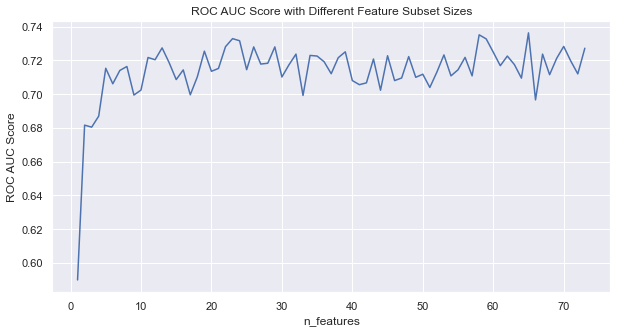

In [14]:
# I wanted to create a graph which shows the ROC AUC Score of the Decision Tree Classifier with top n features
# when made predictions on the Validation data
plt.rcParams["figure.figsize"] = (10,5)
feature_importances = pd.DataFrame(clf.feature_importances_, index = X_Train.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)

acc = []
for i in range(1, len(feature_importances)+1):
    X_Train1 = X_Train[feature_importances.index[:i]]
    X_Train1 = X_Train1.reindex(sorted(X_Train1.columns), axis=1)
    X_Val1  = X_Val[feature_importances.index[:i]]
    X_Val1 = X_Val1.reindex(sorted(X_Val1.columns), axis=1)
    Y_Train1 = Y_Train
    Y_Val1  = Y_Val

    clf = DecisionTreeClassifier(random_state=7)
    clf = clf.fit(X_Train1,Y_Train1)
    Y_Pred1 = clf.predict(X_Val1.reindex(sorted(X_Val1.columns), axis=1))
    acc.append(roc_auc_score(Y_Val1, clf.predict_proba(X_Val1)[::,1]))
    
plt.plot(range(1, len(feature_importances)+1), acc)
plt.title('ROC AUC Score with Different Feature Subset Sizes')
plt.xlabel('n_features')
plt.ylabel('ROC AUC Score')
plt.show()

In [16]:
# Fit a new Decision Tree Classifer with less features and check the ROC AUC Score of the model on the Test Set
X_Train2 = X_Train[feature_importances.index[:23]]
X_Train2 = X_Train2.reindex(sorted(X_Train2.columns), axis=1)
X_Test2  = X_Test[feature_importances.index[:23]]
X_Test2 = X_Test2.reindex(sorted(X_Test2.columns), axis=1)
Y_Train2 = Y_Train
Y_Test2  = Y_Test

clf = DecisionTreeClassifier(random_state=7)
clf = clf.fit(X_Train2, Y_Train2)
Y_Pred2 = clf.predict(X_Test2)
print("Decision Tree Classifier (including top 23 variables)")
print("Performance on the Test Set")
print("")
print("Confusion Matrix")
print(confusion_matrix(Y_Test2, Y_Pred2))
print("")
print ("ROC AUC Score: ", '{:.2%}'.format(roc_auc_score(Y_Test, clf.predict_proba(X_Test2)[::,1])))

Decision Tree Classifier (including top 23 variables)
Performance on the Test Set

Confusion Matrix
[[1889  170]
 [ 174  208]]

ROC AUC Score:  73.06%


In [17]:
# Let's try tuning the hyperparameters of Decision Tree Classifier by using a Cross Validated Random Search
# on the Train Data so that we can hopefully get a higher accuracy score on the Test Data
random_search = {'criterion': ['entropy', 'gini'],
                 'max_depth': list(np.linspace(5, 50, 10, dtype = int)) + [None],
                 'max_features': ['auto', 'sqrt','log2', None],
                 'min_samples_leaf': list(np.linspace(1, 20, 20, dtype = int)),
                 'min_samples_split': list(np.linspace(2, 20, 19, dtype = int))}

clf = DecisionTreeClassifier(random_state=7)
model = RandomizedSearchCV(estimator = clf, param_distributions=random_search, scoring='roc_auc', n_iter=100, 
                               cv = 4, verbose=0, random_state=7, n_jobs = -1)
model.fit(X_Train2, Y_Train2)

print("Random Search")
print("Confusion Matrix")
print("")
prediction = model.best_estimator_.predict(X_Test2)
print(confusion_matrix(Y_Test2, prediction))
print("")
print("Decision Tree ROC AUC Score On the Test Data (Tuned with Random Search):", '{:.2%}'.format(roc_auc_score(Y_Test2, model.best_estimator_.predict_proba(X_Test2)[::,1])))

Random Search
Confusion Matrix

[[1946  113]
 [ 150  232]]

Decision Tree ROC AUC Score On the Test Data (Tuned with Random Search): 91.20%


# ---------------------------- Bagging Classifier ------------------------------ #

In [23]:
# Fit a Bagging Classifer and check the ROC AUC Score of the model on the Test Set
clf = DecisionTreeClassifier(random_state=7)
bgc = BaggingClassifier(base_estimator=clf, random_state=7)
bgc = bgc.fit(X_Train, Y_Train)
Y_Pred = bgc.predict(X_Test)
print("Bagging Classifier (including all 73 variables)")
print("Performance on the Test Set")
print("")
print("Confusion Matrix")
print(confusion_matrix(Y_Test, Y_Pred))
print("")
print ("ROC AUC Score: ", '{:.2%}'.format(roc_auc_score(Y_Test, bgc.predict_proba(X_Test)[::,1])))

Bagging Classifier (including all 73 variables)
Performance on the Test Set

Confusion Matrix
[[1968   91]
 [ 173  209]]

ROC AUC Score:  89.71%


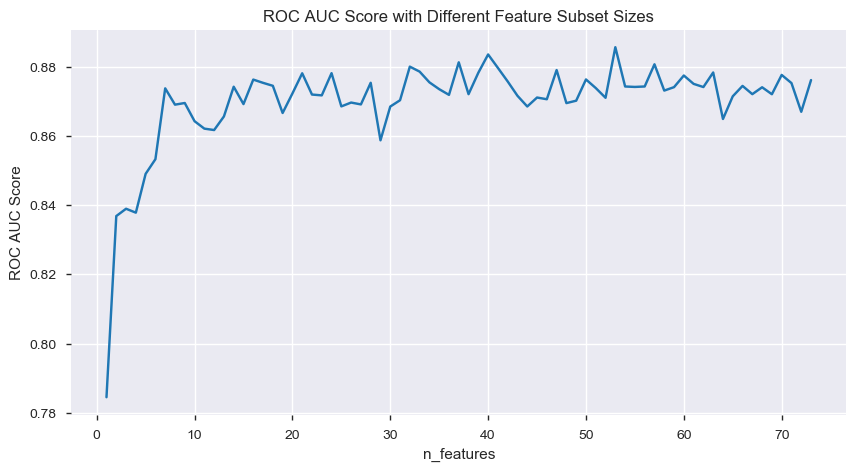

In [24]:
# I wanted to create a graph which shows the ROC AUC Score of the Bagging Classifier with top n features
# when made predictions on the Validation data
plt.rcParams["figure.figsize"] = (10,5)
feature_importances = pd.DataFrame(np.mean([tree.feature_importances_ for tree in bgc.estimators_], axis=0),
                      index = X_Train.columns, columns=['Importance']).sort_values('Importance', ascending=False)

acc = []
for i in range(1, len(feature_importances)+1):
    X_Train1 = X_Train[feature_importances.index[:i]]
    X_Train1 = X_Train1.reindex(sorted(X_Train1.columns), axis=1)
    X_Val1  = X_Val[feature_importances.index[:i]]
    X_Val1 = X_Val1.reindex(sorted(X_Val1.columns), axis=1)
    Y_Train1 = Y_Train
    Y_Val1  = Y_Val

    clf = DecisionTreeClassifier(random_state=7)
    bgc = BaggingClassifier(base_estimator=clf, random_state=7)
    bgc = bgc.fit(X_Train1,Y_Train1)
    Y_Pred1 = bgc.predict(X_Val1.reindex(sorted(X_Val1.columns), axis=1))
    acc.append(roc_auc_score(Y_Val1, bgc.predict_proba(X_Val1)[::,1]))
    
plt.plot(range(1, len(feature_importances)+1), acc)
plt.title('ROC AUC Score with Different Feature Subset Sizes')
plt.xlabel('n_features')
plt.ylabel('ROC AUC Score')
plt.show()

In [25]:
# Fit a new Bagging Classifer with less features and check the ROC AUC Score of the model on the Test Set
X_Train2 = X_Train[feature_importances.index[:52]]
X_Train2 = X_Train2.reindex(sorted(X_Train2.columns), axis=1)
X_Test2  = X_Test[feature_importances.index[:52]]
X_Test2 = X_Test2.reindex(sorted(X_Test2.columns), axis=1)
Y_Train2 = Y_Train
Y_Test2  = Y_Test

clf = DecisionTreeClassifier(random_state=7)
bgc = BaggingClassifier(base_estimator=clf, random_state=7)
bgc = bgc.fit(X_Train2,Y_Train2)
Y_Pred2 = bgc.predict(X_Test2)
print("Bagging Classifier (including top 52 variables)")
print("Performance on the Test Set")
print("")
print("Confusion Matrix")
print(confusion_matrix(Y_Test2, Y_Pred2))
print("")
print ("ROC AUC Score: ", '{:.2%}'.format(roc_auc_score(Y_Test2, bgc.predict_proba(X_Test2)[::,1])))

Bagging Classifier (including top 52 variables)
Performance on the Test Set

Confusion Matrix
[[1972   87]
 [ 177  205]]

ROC AUC Score:  89.63%


In [26]:
# Let's try tuning the hyperparameters of Bagging Classifier by using a Cross Validated Random Search
# on the Train Data so that we can hopefully get a higher accuracy score on the Test Data

random_search = {'base_estimator__criterion': ['entropy', 'gini'],
                 'base_estimator__max_depth': list(np.linspace(5, 50, 10, dtype = int)) + [None],
                 'base_estimator__max_features': ['auto', 'sqrt','log2', None],
                 'base_estimator__min_samples_leaf': list(np.linspace(1, 20, 20, dtype = int)),
                 'base_estimator__min_samples_split': list(np.linspace(2, 20, 19, dtype = int)),
                 'n_estimators': list(np.linspace(50, 500, 10, dtype = int))}

clf = DecisionTreeClassifier(random_state=7)
bgc = BaggingClassifier(base_estimator=clf, random_state=7)
model = RandomizedSearchCV(estimator = bgc, param_distributions=random_search, scoring='roc_auc', n_iter=20, 
                               cv = 4, verbose=0, random_state=7, n_jobs = -1)
model.fit(X_Train2, Y_Train2)

print("Random Search")
print("Confusion Matrix")
print("")
prediction = model.best_estimator_.predict(X_Test2)
print(confusion_matrix(Y_Test2, prediction))
print("")
print("Bagging Classifier ROC AUC Score On the Test Data (Tuned with Random Search):", '{:.2%}'.format(roc_auc_score(Y_Test2, model.best_estimator_.predict_proba(X_Test2)[::,1])))

Random Search
Confusion Matrix

[[1976   83]
 [ 149  233]]

Bagging Classifier ROC AUC Score On the Test Data (Tuned with Random Search): 93.10%


# ------------------------ Random Forest Classifier --------------------------- #

In [27]:
# Fit a Random Forest Classifer and check the ROC AUC Score of the model on the Test Set
rfc = RandomForestClassifier(random_state=7)
rfc = rfc.fit(X_Train, Y_Train)
Y_Pred = rfc.predict(X_Test)
print("Random Forest Classifier (including all 73 variables)")
print("Performance on the Test Set")
print("")
print("Confusion Matrix")
print(confusion_matrix(Y_Test, Y_Pred))
print("")
print ("ROC AUC Score: ", '{:.2%}'.format(roc_auc_score(Y_Test, rfc.predict_proba(X_Test)[::,1])))

Random Forest Classifier (including all 73 variables)
Performance on the Test Set

Confusion Matrix
[[1990   69]
 [ 182  200]]

ROC AUC Score:  91.90%


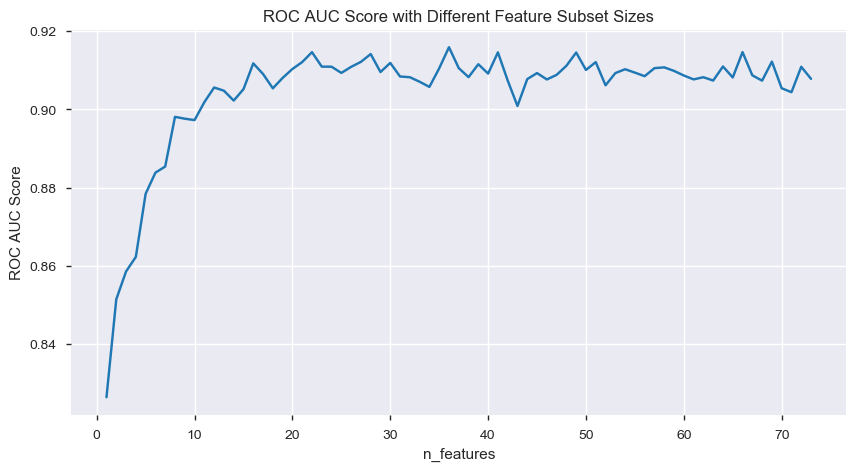

In [28]:
# I wanted to create a graph which shows the ROC AUC Score of the Random Forest Classifier with top n features
# when made predictions on the Validation data
plt.rcParams["figure.figsize"] = (10,5)
feature_importances = pd.DataFrame(rfc.feature_importances_, index = X_Train.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)

acc = []
for i in range(1, len(feature_importances)+1):
    X_Train1 = X_Train[feature_importances.index[:i]]
    X_Train1 = X_Train1.reindex(sorted(X_Train1.columns), axis=1)
    X_Val1  = X_Val[feature_importances.index[:i]]
    X_Val1 = X_Val1.reindex(sorted(X_Val1.columns), axis=1)
    Y_Train1 = Y_Train
    Y_Val1  = Y_Val

    rfc = RandomForestClassifier(random_state=7)
    rfc = rfc.fit(X_Train1, Y_Train1)
    Y_Pred1 = rfc.predict(X_Val1.reindex(sorted(X_Val1.columns), axis=1))
    acc.append(roc_auc_score(Y_Val1, rfc.predict_proba(X_Val1)[::,1]))
    
plt.plot(range(1, len(feature_importances)+1), acc)
plt.title('ROC AUC Score with Different Feature Subset Sizes')
plt.xlabel('n_features')
plt.ylabel('ROC AUC Score')
plt.show()

In [29]:
# Fit a new Random Forest Classifer with less features and check the ROC AUC Score of the model on the Test Set
X_Train2 = X_Train[feature_importances.index[:36]]
X_Train2 = X_Train2.reindex(sorted(X_Train2.columns), axis=1)
X_Test2  = X_Test[feature_importances.index[:36]]
X_Test2 = X_Test2.reindex(sorted(X_Test2.columns), axis=1)
Y_Train2 = Y_Train
Y_Test2  = Y_Test

rfc = RandomForestClassifier(random_state=7)
rfc = rfc.fit(X_Train2, Y_Train2)
Y_Pred2 = rfc.predict(X_Test2)
print("Random Forest Classifier (including top 36 variables)")
print("Performance on the Test Set")
print("")
print("Confusion Matrix")
print(confusion_matrix(Y_Test2, Y_Pred2))
print("")
print ("ROC AUC Score: ", '{:.2%}'.format(roc_auc_score(Y_Test2, rfc.predict_proba(X_Test2)[::,1])))

Random Forest Classifier (including top 36 variables)
Performance on the Test Set

Confusion Matrix
[[1988   71]
 [ 175  207]]

ROC AUC Score:  91.94%


In [30]:
# Let's try tuning the hyperparameters of the Random Forest Classifier by using a Cross Validated Random Search
# on the Train Data so that we can hopefully get a higher accuracy score on the Test Data

random_search = {'criterion': ['entropy', 'gini'],
                 'max_depth': list(np.linspace(5, 50, 10, dtype = int)) + [None],
                 'max_features': ['auto', 'sqrt','log2', None],
                 'min_samples_leaf': list(np.linspace(1, 20, 20, dtype = int)),
                 'min_samples_split': list(np.linspace(2, 20, 19, dtype = int)),
                 'n_estimators': list(np.linspace(50, 500, 10, dtype = int))}

rfc = RandomForestClassifier(random_state=7)
model = RandomizedSearchCV(estimator = rfc, param_distributions=random_search, scoring='roc_auc', n_iter=20, 
                               cv = 4, verbose=0, random_state=7, n_jobs = -1)
model.fit(X_Train2, Y_Train2)

print("Random Search")
print("Confusion Matrix")
print("")
prediction = model.best_estimator_.predict(X_Test2)
print(confusion_matrix(Y_Test2, prediction))
print("")
print("Random Forest ROC AUC Score On the Test Data (Tuned with Random Search):", '{:.2%}'.format(roc_auc_score(Y_Test2, model.best_estimator_.predict_proba(X_Test2)[::,1])))

Random Search
Confusion Matrix

[[1975   84]
 [ 152  230]]

Random Forest ROC AUC Score On the Test Data (Tuned with Random Search): 93.07%


# ---------------------------- Adaptive Boosting ------------------------------- #

In [79]:
# Fit a AdaBoost Classifer and check the ROC AUC Score of the model on the Test Set
abc = AdaBoostClassifier(random_state=7)
abc = abc.fit(X_Train, Y_Train)
Y_Pred = abc.predict(X_Test)
print("AdaBoost Classifier (including all 73 variables)")
print("Performance on the Test Set")
print("")
print("Confusion Matrix")
print(confusion_matrix(Y_Test, Y_Pred))
print("")
print ("ROC AUC Score: ", '{:.2%}'.format(roc_auc_score(Y_Test, abc.predict_proba(X_Test)[::,1])))

AdaBoost Classifier (including all 73 variables)
Performance on the Test Set

Confusion Matrix
[[1954  105]
 [ 168  214]]

ROC AUC Score:  90.44%


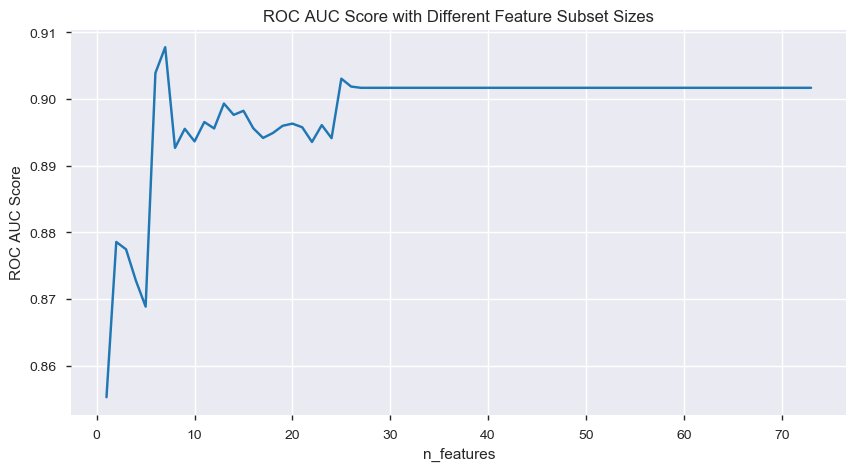

In [80]:
# I wanted to create a graph which shows the ROC AUC Score of the AdaBoost Classifier with top n features
# when made predictions on the Validation data
plt.rcParams["figure.figsize"] = (10,5)
feature_importances = pd.DataFrame(abc.feature_importances_, index = X_Train.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)

acc = []
for i in range(1, len(feature_importances)+1):
    X_Train1 = X_Train[feature_importances.index[:i]]
    X_Train1 = X_Train1.reindex(sorted(X_Train1.columns), axis=1)
    X_Val1  = X_Val[feature_importances.index[:i]]
    X_Val1 = X_Val1.reindex(sorted(X_Val1.columns), axis=1)
    Y_Train1 = Y_Train
    Y_Val1  = Y_Val

    abc = AdaBoostClassifier(random_state=7)
    abc = abc.fit(X_Train1,Y_Train1)
    Y_Pred1 = abc.predict(X_Val1.reindex(sorted(X_Val1.columns), axis=1))
    acc.append(roc_auc_score(Y_Val1, abc.predict_proba(X_Val1)[::,1]))
    
plt.plot(range(1, len(feature_importances)+1), acc)
plt.title('ROC AUC Score with Different Feature Subset Sizes')
plt.xlabel('n_features')
plt.ylabel('ROC AUC Score')
plt.show()

In [81]:
# Fit a new AdaBoost Classifer with less features and check the ROC AUC Score of the model on the Test Set
X_Train2 = X_Train[feature_importances.index[:25]]
X_Train2 = X_Train2.reindex(sorted(X_Train2.columns), axis=1)
X_Test2  = X_Test[feature_importances.index[:25]]
X_Test2 = X_Test2.reindex(sorted(X_Test2.columns), axis=1)
Y_Train2 = Y_Train
Y_Test2  = Y_Test

abc = AdaBoostClassifier(random_state=7)
abc = abc.fit(X_Train2, Y_Train2)
Y_Pred2 = abc.predict(X_Test2)
print("AdaBoost Classifier (including top 25 variables)")
print("Performance on the Test Set")
print("")
print("Confusion Matrix")
print(confusion_matrix(Y_Test2, Y_Pred2))
print("")
print ("ROC AUC Score: ", '{:.2%}'.format(roc_auc_score(Y_Test2, abc.predict_proba(X_Test2)[::,1])))

AdaBoost Classifier (including top 25 variables)
Performance on the Test Set

Confusion Matrix
[[1953  106]
 [ 168  214]]

ROC AUC Score:  90.38%


In [82]:
# Let's try tuning the hyperparameters of the AdaBoost Classifier by using a Cross Validated Random Search
# on the Train Data so that we can hopefully get a higher accuracy score on the Test Data

random_search = {'learning_rate': list(np.linspace(0.05, 1.00, 20, dtype = float)),
                 'n_estimators': list(np.linspace(50, 500, 10, dtype = int))}

abc = AdaBoostClassifier(random_state=7)
model = RandomizedSearchCV(estimator = abc, param_distributions=random_search, scoring='roc_auc', n_iter=20, 
                               cv = 4, verbose=0, random_state=7, n_jobs = -1)
model.fit(X_Train2, Y_Train2)

print("Random Search")
print("Confusion Matrix")
print("")
prediction = model.best_estimator_.predict(X_Test2)
print(confusion_matrix(Y_Test2, prediction))
print("")
print("AdaBoost ROC AUC Score On the Test Data (Tuned with Random Search):", '{:.2%}'.format(roc_auc_score(Y_Test2, model.best_estimator_.predict_proba(X_Test2)[::,1])))

Random Search
Confusion Matrix

[[1962   97]
 [ 164  218]]

AdaBoost ROC AUC Score On the Test Data (Tuned with Random Search): 91.25%


# ---------------------------- Gradient Boosting ------------------------------ #

In [8]:
# Fit a Gradient Boosting Classifer and check the ROC AUC Score of the model on the Test Set
gbc = GradientBoostingClassifier(random_state=7)
gbc = gbc.fit(X_Train, Y_Train)
Y_Pred = gbc.predict(X_Test)
print("Gradient Boosting Classifier (including all 73 variables)")
print("Performance on the Test Set")
print("")
print("Confusion Matrix")
print(confusion_matrix(Y_Test, Y_Pred))
print("")
print ("ROC AUC Score: ", '{:.2%}'.format(roc_auc_score(Y_Test, gbc.predict_proba(X_Test)[::,1])))

Gradient Boosting Classifier (including all 73 variables)
Performance on the Test Set

Confusion Matrix
[[1969   90]
 [ 151  231]]

ROC AUC Score:  92.78%


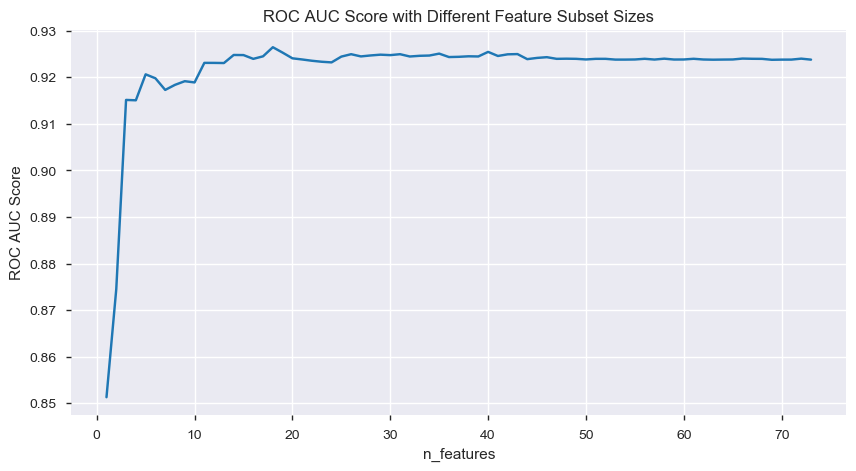

In [9]:
# I wanted to create a graph which shows the ROC AUC Score of the Gradient Boosting Classifier with top n features
# when made predictions on the Validation data
plt.rcParams["figure.figsize"] = (10,5)
feature_importances = pd.DataFrame(gbc.feature_importances_, index = X_Train.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)

acc = []
for i in range(1, len(feature_importances)+1):
    X_Train1 = X_Train[feature_importances.index[:i]]
    X_Train1 = X_Train1.reindex(sorted(X_Train1.columns), axis=1)
    X_Val1  = X_Val[feature_importances.index[:i]]
    X_Val1 = X_Val1.reindex(sorted(X_Val1.columns), axis=1)
    Y_Train1 = Y_Train
    Y_Val1  = Y_Val

    gbc = GradientBoostingClassifier(random_state=7)
    gbc = gbc.fit(X_Train1,Y_Train1)
    Y_Pred1 = gbc.predict(X_Val1.reindex(sorted(X_Val1.columns), axis=1))
    acc.append(roc_auc_score(Y_Val1, gbc.predict_proba(X_Val1)[::,1]))
    
plt.plot(range(1, len(feature_importances)+1), acc)
plt.title('ROC AUC Score with Different Feature Subset Sizes')
plt.xlabel('n_features')
plt.ylabel('ROC AUC Score')
plt.show()

In [10]:
# Fit a new Gradient Boosting Classifer with less features and check the ROC AUC Score of the model on the Test Set
X_Train2 = X_Train[feature_importances.index[:18]]
X_Train2 = X_Train2.reindex(sorted(X_Train2.columns), axis=1)
X_Test2  = X_Test[feature_importances.index[:18]]
X_Test2 = X_Test2.reindex(sorted(X_Test2.columns), axis=1)
Y_Train2 = Y_Train
Y_Test2  = Y_Test

gbc = GradientBoostingClassifier(random_state=7)
gbc = gbc.fit(X_Train2, Y_Train2)
Y_Pred2 = gbc.predict(X_Test2)
print("Gradient Boosting Classifier (including top 18 variables)")
print("Performance on the Test Set")
print("")
print("Confusion Matrix")
print(confusion_matrix(Y_Test2, Y_Pred2))
print("")
print ("ROC AUC Score: ", '{:.2%}'.format(roc_auc_score(Y_Test2, gbc.predict_proba(X_Test2)[::,1])))

Gradient Boosting Classifier (including top 18 variables)
Performance on the Test Set

Confusion Matrix
[[1968   91]
 [ 147  235]]

ROC AUC Score:  92.75%


In [16]:
# Let's try tuning the hyperparameters of the Gradient Boosting Classifier by using a Cross Validated Random Search
# on the Train Data so that we can hopefully get a higher accuracy score on the Test Data

random_search = {'max_depth': list(np.linspace(5, 30, 26, dtype = int)) + [None],
                 'max_features': ['auto', 'sqrt','log2', None],
                 'min_samples_leaf': list(np.linspace(1, 20, 20, dtype = int)),
                 'min_samples_split': list(np.linspace(2, 20, 19, dtype = int)),
                 'n_estimators': list(np.linspace(50, 500, 10, dtype = int)),
                 'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]}

gbc = GradientBoostingClassifier(random_state=7)
model = RandomizedSearchCV(estimator = gbc, param_distributions=random_search, scoring='roc_auc', n_iter=20, 
                               cv = 4, verbose=0, random_state=7, n_jobs = -1)
model.fit(X_Train2, Y_Train2)

print("Random Search")
print("Confusion Matrix")
print("")
prediction = model.best_estimator_.predict(X_Test2)
print(confusion_matrix(Y_Test2, prediction))
print("")
print("Gradient Boosting ROC AUC Score On the Test Data (Tuned with Random Search):", '{:.2%}'.format(roc_auc_score(Y_Test2, model.best_estimator_.predict_proba(X_Test2)[::,1])))

Random Search
Confusion Matrix

[[1977   82]
 [ 160  222]]

Gradient Boosting ROC AUC Score On the Test Data (Tuned with Random Search): 93.05%


# ----------------------------- XGBoost Classifier ------------------------------- #

In [69]:
# Fit a XGBoost Classifer and check the ROC AUC Score of the model on the Test Set
xgb = XGBClassifier(random_state=7)
xgb = xgb.fit(X_Train, Y_Train)
Y_Pred = xgb.predict(X_Test)
print("XGBoost Classifier (including all 73 variables)")
print("Performance on the Test Set")
print("")
print("Confusion Matrix")
print(confusion_matrix(Y_Test, Y_Pred))
print("")
print ("ROC AUC Score: ", '{:.2%}'.format(roc_auc_score(Y_Test, xgb.predict_proba(X_Test)[::,1])))

XGBoost Classifier (including all 73 variables)
Performance on the Test Set

Confusion Matrix
[[1966   93]
 [ 158  224]]

ROC AUC Score:  91.76%


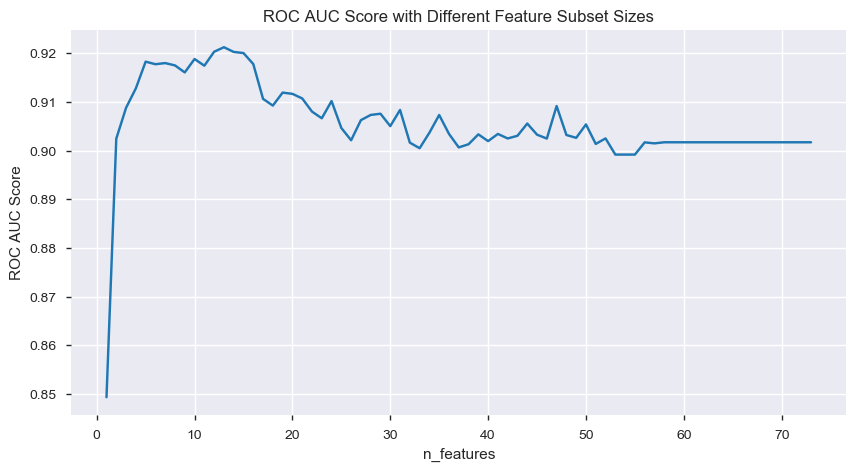

In [70]:
# I wanted to create a graph which shows the ROC AUC Score of the XGBoost Classifier with top n features
# when made predictions on the Validation data
plt.rcParams["figure.figsize"] = (10,5)
feature_importances = pd.DataFrame(xgb.feature_importances_, index = X_Train.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)

acc = []
for i in range(1, len(feature_importances)+1):
    X_Train1 = X_Train[feature_importances.index[:i]]
    X_Train1 = X_Train1.reindex(sorted(X_Train1.columns), axis=1)
    X_Val1  = X_Val[feature_importances.index[:i]]
    X_Val1 = X_Val1.reindex(sorted(X_Val1.columns), axis=1)
    Y_Train1 = Y_Train
    Y_Val1  = Y_Val

    xgb = XGBClassifier(random_state=7)
    xgb = xgb.fit(X_Train1,Y_Train1)
    Y_Pred1 = xgb.predict(X_Val1.reindex(sorted(X_Val1.columns), axis=1))
    acc.append(roc_auc_score(Y_Val1, xgb.predict_proba(X_Val1)[::,1]))
    
plt.plot(range(1, len(feature_importances)+1), acc)
plt.title('ROC AUC Score with Different Feature Subset Sizes')
plt.xlabel('n_features')
plt.ylabel('ROC AUC Score')
plt.show()

In [71]:
# Fit a new XGBoost Classifer with less features and check the ROC AUC Score of the model on the Test Set
X_Train2 = X_Train[feature_importances.index[:13]]
X_Train2 = X_Train2.reindex(sorted(X_Train2.columns), axis=1)
X_Test2  = X_Test[feature_importances.index[:13]]
X_Test2 = X_Test2.reindex(sorted(X_Test2.columns), axis=1)
Y_Train2 = Y_Train
Y_Test2  = Y_Test

xgb = XGBClassifier(random_state=7)
xgb = xgb.fit(X_Train2, Y_Train2)
Y_Pred2 = xgb.predict(X_Test2)
print("XGBoost Classifier (including top 13 variables)")
print("Performance on the Test Set")
print("")
print("Confusion Matrix")
print(confusion_matrix(Y_Test2, Y_Pred2))
print("")
print ("ROC AUC Score: ", '{:.2%}'.format(roc_auc_score(Y_Test2, xgb.predict_proba(X_Test2)[::,1])))

XGBoost Classifier (including top 13 variables)
Performance on the Test Set

Confusion Matrix
[[1966   93]
 [ 170  212]]

ROC AUC Score:  91.20%


In [72]:
# Let's try tuning the hyperparameters of the XGBoost Classifier by using a Cross Validated Random Search
# on the Train Data so that we can hopefully get a higher accuracy score on the Test Data

random_search = {'max_depth': list(np.linspace(5, 50, 10, dtype = int)) + [None],
                 'max_features': ['auto', 'sqrt','log2', None],
                 'min_samples_leaf': list(np.linspace(1, 20, 20, dtype = int)),
                 'min_samples_split': list(np.linspace(2, 20, 19, dtype = int)),
                 'n_estimators': list(np.linspace(50, 500, 10, dtype = int)),
                 'min_child_weight': [1, 5, 10],
                 'gamma': [0.5, 1, 1.5, 2, 5],
                 'subsample': [0.6, 0.8, 1.0],
                 'colsample_bytree': [0.6, 0.8, 1.0],
                 'learning_rate': list(np.linspace(0.05, 1.00, 20, dtype = float))}

xgb = XGBClassifier(random_state=7)
model = RandomizedSearchCV(estimator = xgb, param_distributions=random_search, scoring='roc_auc', n_iter=20, 
                               cv = 4, verbose=0, random_state=7, n_jobs = -1)
model.fit(X_Train2, Y_Train2)

print("Random Search")
print("Confusion Matrix")
print("")
prediction = model.best_estimator_.predict(X_Test2)
print(confusion_matrix(Y_Test2, prediction))
print("")
print("XGBoost ROC AUC Score On the Test Data (Tuned with Random Search):", '{:.2%}'.format(roc_auc_score(Y_Test2, model.best_estimator_.predict_proba(X_Test2)[::,1])))

Random Search
Confusion Matrix

[[1962   97]
 [ 152  230]]

XGBoost ROC AUC Score On the Test Data (Tuned with Random Search): 92.27%


# ---------------------------- Light GBM Classifier ------------------------------ #

In [53]:
# Fit a Light GBM Classifer and check the ROC AUC Score of the model on the Test Set
lgbm = lgb.LGBMClassifier(random_state=7)
lgbm = lgbm.fit(X_Train, Y_Train)
Y_Pred = lgbm.predict(X_Test)
print("Light GBM Classifier (including all 73 variables)")
print("Performance on the Test Set")
print("")
print("Confusion Matrix")
print(confusion_matrix(Y_Test, Y_Pred))
print("")
print ("ROC AUC Score: ", '{:.2%}'.format(roc_auc_score(Y_Test, lgbm.predict_proba(X_Test)[::,1])))

Light GBM Classifier (including all 73 variables)
Performance on the Test Set

Confusion Matrix
[[1967   92]
 [ 154  228]]

ROC AUC Score:  92.57%


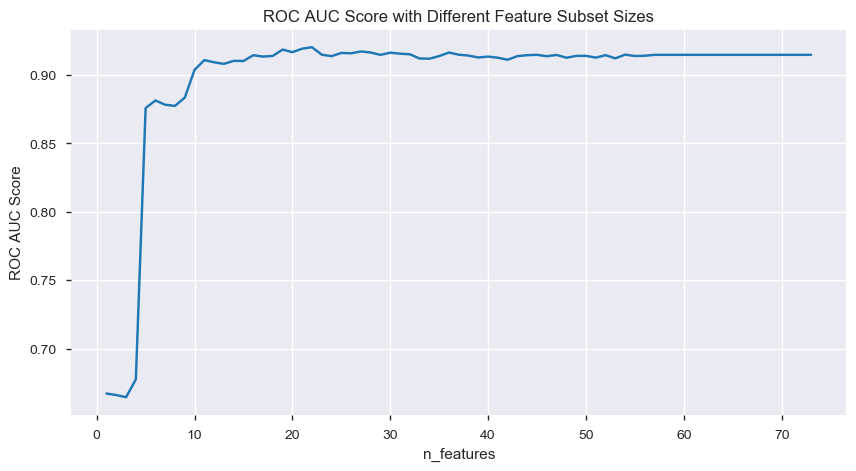

In [54]:
# I wanted to create a graph which shows the ROC AUC Score of the Light GBM Classifier with top n features
# when made predictions on the Validation data
plt.rcParams["figure.figsize"] = (10,5)
feature_importances = pd.DataFrame(lgbm.feature_importances_, index = X_Train.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)

acc = []
for i in range(1, len(feature_importances)+1):
    X_Train1 = X_Train[feature_importances.index[:i]]
    X_Train1 = X_Train1.reindex(sorted(X_Train1.columns), axis=1)
    X_Val1  = X_Val[feature_importances.index[:i]]
    X_Val1 = X_Val1.reindex(sorted(X_Val1.columns), axis=1)
    Y_Train1 = Y_Train
    Y_Val1  = Y_Val

    lgbm = lgb.LGBMClassifier(random_state=7)
    lgbm = lgbm.fit(X_Train1,Y_Train1)
    Y_Pred1 = lgbm.predict(X_Val1.reindex(sorted(X_Val1.columns), axis=1))
    acc.append(roc_auc_score(Y_Val1, lgbm.predict_proba(X_Val1)[::,1]))
    
plt.plot(range(1, len(feature_importances)+1), acc)
plt.title('ROC AUC Score with Different Feature Subset Sizes')
plt.xlabel('n_features')
plt.ylabel('ROC AUC Score')
plt.show()

In [55]:
# Fit a new Light GBM Classifer with less features and check the ROC AUC Score of the model on the Test Set
X_Train2 = X_Train[feature_importances.index[:21]]
X_Train2 = X_Train2.reindex(sorted(X_Train2.columns), axis=1)
X_Test2  = X_Test[feature_importances.index[:21]]
X_Test2 = X_Test2.reindex(sorted(X_Test2.columns), axis=1)
Y_Train2 = Y_Train
Y_Test2  = Y_Test

lgbm = lgb.LGBMClassifier(random_state=7)
lgbm = lgbm.fit(X_Train2, Y_Train2)
Y_Pred2 = lgbm.predict(X_Test2)
print("Light GBM Classifier (including top 21 variables)")
print("Performance on the Test Set")
print("")
print("Confusion Matrix")
print(confusion_matrix(Y_Test2, Y_Pred2))
print("")
print ("ROC AUC Score: ", '{:.2%}'.format(roc_auc_score(Y_Test2, lgbm.predict_proba(X_Test2)[::,1])))

Light GBM Classifier (including top 21 variables)
Performance on the Test Set

Confusion Matrix
[[1972   87]
 [ 157  225]]

ROC AUC Score:  92.60%


In [68]:
random_search = {'max_depth': list(np.linspace(5, 50, 10, dtype = int)) + [None],
                 'max_features': ['auto', 'sqrt','log2', None],
                 'min_samples_leaf': list(np.linspace(1, 20, 20, dtype = int)),
                 'min_samples_split': list(np.linspace(2, 20, 19, dtype = int)),
                 'n_estimators': list(np.linspace(50, 500, 10, dtype = int)),
                 'min_child_weight': [1, 5, 10],
                 'gamma': [0.5, 1, 1.5, 2, 5],
                 'subsample': [0.6, 0.8, 1.0],
                 'colsample_bytree': [0.6, 0.8, 1.0],
                 'learning_rate': list(np.linspace(0.05, 1.00, 20, dtype = float))}

lgbm = lgb.LGBMClassifier(random_state=7)
model = RandomizedSearchCV(estimator = lgbm, param_distributions=random_search, scoring='roc_auc', n_iter=100, 
                               cv = 4, verbose=0, random_state=7, n_jobs = -1)
model.fit(X_Train2, Y_Train2)

print("Random Search")
print("Confusion Matrix")
print("")
prediction = model.best_estimator_.predict(X_Test2)
print(confusion_matrix(Y_Test2, prediction))
print("")
print("Light GBM ROC AUC Score On the Test Data (Tuned with Random Search):", '{:.2%}'.format(roc_auc_score(Y_Test2, model.best_estimator_.predict_proba(X_Test2)[::,1])))

Random Search
Confusion Matrix

[[1971   88]
 [ 149  233]]

Light GBM ROC AUC Score On the Test Data (Tuned with Random Search): 92.80%


# ----------------------------- CatBoost Classifier ------------------------------- #

In [8]:
# Fit a CatBoost Classifer and check the ROC AUC Score of the model on the Test Set
cb = CatBoostClassifier(verbose=False, random_state=7)
cb = cb.fit(X_Train, Y_Train)
Y_Pred = cb.predict(X_Test)
print("CatBoost Classifier (including all 73 variables)")
print("Performance on the Test Set")
print("")
print("Confusion Matrix")
print(confusion_matrix(Y_Test, Y_Pred))
print("")
print ("ROC AUC Score: ", '{:.2%}'.format(roc_auc_score(Y_Test, cb.predict_proba(X_Test)[::,1])))

CatBoost Classifier (including all 73 variables)
Performance on the Test Set

Confusion Matrix
[[1978   81]
 [ 162  220]]

ROC AUC Score:  92.70%


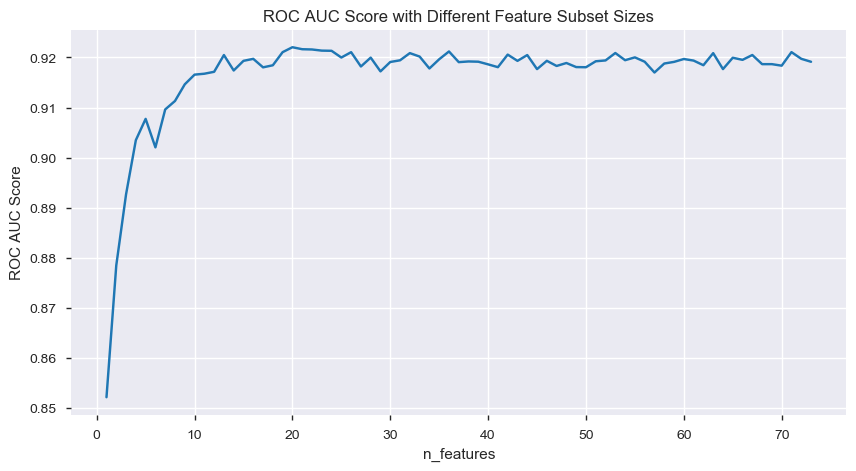

In [9]:
# I wanted to create a graph which shows the ROC AUC Score of the CatBoost Classifier with top n features
# when made predictions on the Validation data
plt.rcParams["figure.figsize"] = (10,5)
feature_importances = pd.DataFrame(cb.feature_importances_, index = X_Train.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)

acc = []
for i in range(1, len(feature_importances)+1):
    X_Train1 = X_Train[feature_importances.index[:i]]
    X_Train1 = X_Train1.reindex(sorted(X_Train1.columns), axis=1)
    X_Val1  = X_Val[feature_importances.index[:i]]
    X_Val1 = X_Val1.reindex(sorted(X_Val1.columns), axis=1)
    Y_Train1 = Y_Train
    Y_Val1  = Y_Val

    cb = CatBoostClassifier(verbose=False, random_state=7)
    cb = cb.fit(X_Train1,Y_Train1)
    Y_Pred1 = cb.predict(X_Val1.reindex(sorted(X_Val1.columns), axis=1))
    acc.append(roc_auc_score(Y_Val1, cb.predict_proba(X_Val1)[::,1]))
    
plt.plot(range(1, len(feature_importances)+1), acc)
plt.title('ROC AUC Score with Different Feature Subset Sizes')
plt.xlabel('n_features')
plt.ylabel('ROC AUC Score')
plt.show()

In [10]:
# Fit a new CatBoost Classifer with less features and check the ROC AUC Score of the model on the Test Set
X_Train2 = X_Train[feature_importances.index[:20]]
X_Train2 = X_Train2.reindex(sorted(X_Train2.columns), axis=1)
X_Test2  = X_Test[feature_importances.index[:20]]
X_Test2 = X_Test2.reindex(sorted(X_Test2.columns), axis=1)
Y_Train2 = Y_Train
Y_Test2  = Y_Test

cb = CatBoostClassifier(verbose=False, random_state=7)
cb = cb.fit(X_Train2, Y_Train2)
Y_Pred2 = cb.predict(X_Test2)
print("CatBoost Classifier (including top 20 variables)")
print("Performance on the Test Set")
print("")
print("Confusion Matrix")
print(confusion_matrix(Y_Test2, Y_Pred2))
print("")
print ("ROC AUC Score: ", '{:.2%}'.format(roc_auc_score(Y_Test2, cb.predict_proba(X_Test2)[::,1])))

CatBoost Classifier (including top 20 variables)
Performance on the Test Set

Confusion Matrix
[[1974   85]
 [ 162  220]]

ROC AUC Score:  92.72%


In [12]:
# Let's try tuning the hyperparameters of the CatBoost Classifier by using a Cross Validated Random Search
# on the Train Data so that we can hopefully get a higher accuracy score on the Test Data

random_search = {'n_estimators': list(np.linspace(100, 1000, 10, dtype = int)),
                 'subsample': [0.6, 0.8, 1.0],
                 'learning_rate': list(np.linspace(0.05, 1.00, 20, dtype = float))}

cb = CatBoostClassifier(verbose=False, random_state=7)
model = RandomizedSearchCV(estimator = cb, param_distributions=random_search, scoring='roc_auc', n_iter=20, 
                               cv = 4, verbose=0, random_state=7, n_jobs = -1)
model.fit(X_Train2, Y_Train2)

print("Random Search")
print("Confusion Matrix")
print("")
prediction = model.best_estimator_.predict(X_Test2)
print(confusion_matrix(Y_Test2, prediction))
print("")
print("CatBoost ROC AUC Score On the Test Data (Tuned with Random Search):", '{:.2%}'.format(roc_auc_score(Y_Test2, model.best_estimator_.predict_proba(X_Test2)[::,1])))

Random Search
Confusion Matrix

[[1979   80]
 [ 160  222]]

CatBoost ROC AUC Score On the Test Data (Tuned with Random Search): 92.83%


# ------------------------------- SVM Classifier --------------------------------- #

In [69]:
# Fit a SVM Classifer and check the ROC AUC Score of the model on the Test Set
min_max_scaler = preprocessing.MinMaxScaler()
svcf = svm.SVC(kernel='linear', probability=True, random_state=7)
svcf = svcf.fit(min_max_scaler.fit_transform(X_Train), Y_Train)
Y_Pred = svcf.predict(min_max_scaler.fit_transform(X_Test))
print("SVM Classifier (including all 73 variables)")
print("Performance on the Test Set")
print("")
print("Confusion Matrix")
print(confusion_matrix(Y_Test, Y_Pred))
print("")
print ("ROC AUC Score: ", '{:.2%}'.format(roc_auc_score(Y_Test, svcf.predict_proba(min_max_scaler.fit_transform(X_Test))[::,1])))

SVM Classifier (including all 73 variables)
Performance on the Test Set

Confusion Matrix
[[1995   64]
 [ 222  160]]

ROC AUC Score:  87.38%


100%|██████████| 73/73 [10:09<00:00,  8.35s/it]


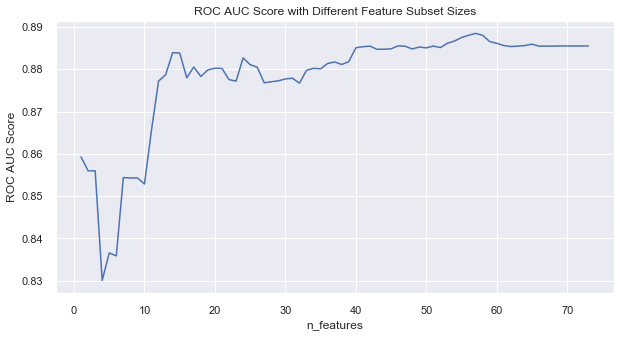

In [70]:
# I wanted to create a graph which shows the ROC AUC Score of the SVM Classifier with top n features
# when made predictions on the Validation data
plt.rcParams["figure.figsize"] = (10,5)
feature_importances = pd.DataFrame(np.abs(svcf.coef_).reshape(-1,1), index = X_Train.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)

acc = []
for i in tqdm(range(1, len(feature_importances)+1)):
    X_Train1 = X_Train[feature_importances.index[:i]]
    X_Train1 = X_Train1.reindex(sorted(X_Train1.columns), axis=1)
    X_Val1  = X_Val[feature_importances.index[:i]]
    X_Val1 = X_Val1.reindex(sorted(X_Val1.columns), axis=1)
    Y_Train1 = Y_Train
    Y_Val1  = Y_Val

    svcf = svm.SVC(kernel='linear', probability=True, random_state=7)
    svcf = svcf.fit(min_max_scaler.fit_transform(X_Train1),Y_Train1)
    Y_Pred1 = svcf.predict(X_Val1.reindex(sorted(X_Val1.columns), axis=1))
    acc.append(roc_auc_score(Y_Val1, svcf.predict_proba(min_max_scaler.fit_transform(X_Val1))[::,1]))
    
plt.plot(range(1, len(feature_importances)+1), acc)
plt.title('ROC AUC Score with Different Feature Subset Sizes')
plt.xlabel('n_features')
plt.ylabel('ROC AUC Score')
plt.show()

In [76]:
# Fit a new SVM Classifer with less features and check the ROC AUC Score of the model on the Test Set
X_Train2 = X_Train[feature_importances.index[:57]]
X_Train2 = X_Train2.reindex(sorted(X_Train2.columns), axis=1)
X_Test2  = X_Test[feature_importances.index[:57]]
X_Test2 = X_Test2.reindex(sorted(X_Test2.columns), axis=1)
Y_Train2 = Y_Train
Y_Test2  = Y_Test

svcf = svm.SVC(kernel='linear', probability=True, random_state=7)
svcf = svcf.fit(min_max_scaler.fit_transform(X_Train2), Y_Train2)
Y_Pred2 = svcf.predict(min_max_scaler.fit_transform(X_Test2))
print("SVM Classifier (including top 57 variables)")
print("Performance on the Test Set")
print("")
print("Confusion Matrix")
print(confusion_matrix(Y_Test2, Y_Pred2))
print("")
print("ROC AUC Score: ", '{:.2%}'.format(roc_auc_score(Y_Test2, svcf.predict_proba((min_max_scaler.fit_transform(X_Test2)))[::,1])))

SVM Classifier (including top 57 variables)
Performance on the Test Set

Confusion Matrix
[[1995   64]
 [ 221  161]]

ROC AUC Score:  87.53%


In [90]:
# Let's try tuning the hyperparameters of the SVM Classifier by using a Cross Validated Random Search
# on the Train Data so that we can hopefully get a higher accuracy score on the Test Data

random_search = {'kernel':  ['linear', 'rbf', 'poly'],
                 'C':       [0.1, 0.5, 1, 2, 3, 5, 10, 100],
                 'gamma':   [0.00001, 0.0001, 0.001, 0.01, 0.1] }

svcf = svm.SVC(kernel='linear', probability=True, random_state=7)
model = RandomizedSearchCV(estimator = svcf, param_distributions=random_search, scoring='roc_auc', n_iter=20, 
                               cv = 4, verbose=0, random_state=7, n_jobs = -1)
model.fit(min_max_scaler.fit_transform(X_Train2), Y_Train2)

print("Random Search")
print("Confusion Matrix")
print("")
prediction = model.best_estimator_.predict(min_max_scaler.fit_transform(X_Test2))
print(confusion_matrix(Y_Test2, prediction))
print("")
print("SVM ROC AUC Score On the Test Data (Tuned with Random Search):", '{:.2%}'.format(roc_auc_score(Y_Test2, model.best_estimator_.predict_proba(min_max_scaler.fit_transform(X_Test2))[::,1])))

Random Search
Confusion Matrix

[[2024   35]
 [ 278  104]]

SVM ROC AUC Score On the Test Data (Tuned with Random Search): 88.58%
